# Fast5 Raw Data extraction

In [35]:
raw_path = "../data/raw/IBIS218_010_036_RCC_Sample1_2601_1.fast5"
channel = 144
sample_rate = 5e-3
metrichor_path  = "../data/Download/IBIS218_010_036_RCC_Sample1_2601_1_ch{0}_file0_strand.fast5".format(channel)
reference_path = "../data/illumina_reference/p3_i2_t112498_Ram_collo_cygni_ge.contig.fa"

In [36]:
import h5py
import numpy as np
from pprint import pprint
from pylab import *
import seaborn as sns
import csv
%matplotlib inline

In [37]:
f = h5py.File(raw_path, 'r')

In [38]:
raw_data = f["/Raw/Channel_{0}/Signal".format(channel)]

In [39]:
metrichor_tsv = !poretools events {metrichor_path}

In [40]:
metrichor_data = csv.reader(metrichor_tsv, delimiter='\t')

In [41]:
metrichor_events = []
for i, row in enumerate(metrichor_data):
    if i == 0:
        pprint(list(enumerate(row)))
    else:
        if int(row[8]) > 0: 
            metrichor_events.append(float(row[3]) * (1/sample_rate))

[(0, 'file'),
 (1, 'strand'),
 (2, 'mean'),
 (3, 'start'),
 (4, 'stdv'),
 (5, 'length'),
 (6, 'model_state'),
 (7, 'model_level'),
 (8, 'move'),
 (9, 'p_model_state'),
 (10, 'mp_model_state'),
 (11, 'p_mp_model_state'),
 (12, 'p_A'),
 (13, 'p_C'),
 (14, 'p_G'),
 (15, 'p_T'),
 (16, 'raw_index')]


In [42]:
print(metrichor_events)

[69735.7901726, 69737.250996, 70176.494024, 70738.5790172, 70739.442231, 71054.0504648, 71057.83532540001, 71495.4183266, 71496.2151394, 71965.0066402, 72072.310757, 72446.0823374, 72711.95219119999, 72770.7835326, 72773.7715804, 72993.4262948, 73050.13280220001, 73190.504648, 73197.2775564, 73323.1075698, 73439.1102258, 73517.3970784, 73569.7211156, 73571.7131474, 73644.0239044, 73666.998672, 73783.2005312, 73788.7782204, 74056.374502, 74150.2656042, 74160.557769, 74162.8818062, 74330.81009300001, 74336.9189908, 74597.6759628, 74599.2695884, 74647.2775564, 74649.3359894, 74977.0916334, 75022.17795479999, 75767.065073, 75772.7755644, 76117.79548480001, 76276.62682599999, 76331.6733068, 76342.89508639999]


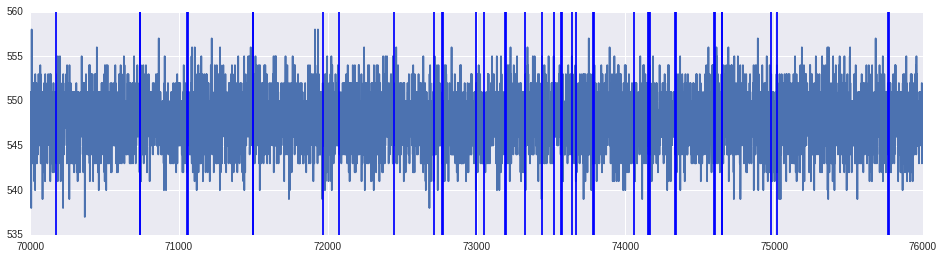

In [43]:
(start, end) = (int(70000), int(76000))
fig, ax = subplots(figsize=(16, 4))
ax.plot(range(start, end), raw_data[start:end]
for event in metrichor_events: 
    if start <= event < end:
         ax.axvline(event)